In [177]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
#from PIL import Image
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

Text(0.5, 1.0, 'distribution of images')

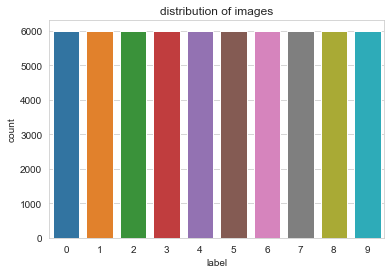

In [179]:
l=list(y_train)
num_classes=10
train_size=x_train.shape[0]
count_dict= {k:0 for k in range(num_classes)}
for index in range(train_size):
    class_id=y_train[index]
    count_dict[class_id]+=1
count_dict  
df=pd.DataFrame(count_dict, index=[0])
sns.set_style('whitegrid')
ax=sns.barplot(data=df)
ax.set(xlabel="label", ylabel="count")
ax.set_title("distribution of images")

(60000, 28, 28)
(60000,)


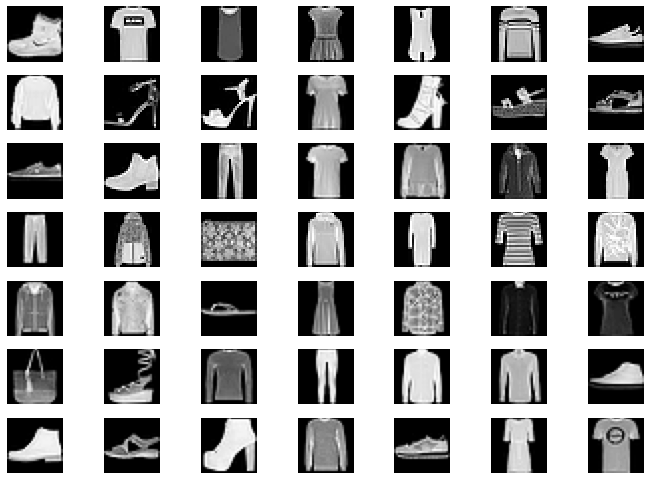

In [180]:
print(x_train.shape)
print(y_train.shape)
rows, cols= 7, 7
tot=49
fig=plt.figure(figsize=(10,7))
im=x_train[0:tot]
for index in range(tot):
    fig.add_subplot(rows,cols,index+1)
    plt.imshow(x_train[index], cmap='gray', vmin=0, vmax=255)
    #plt.title('Image{}'.format(index+1
    plt.tight_layout()
    plt.axis('off')
    #plt.show()

In [182]:
x_train.shape

(60000, 28, 28)

In [183]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test=x_test.reshape(10000, 784).astype("float32")/255
y_train=y_train.astype("float32")
y_test=y_test.astype("float32")
x_val = x_train[-1000:]
y_val = y_train[-1000:]
x_train = x_train[:-1000]
y_train = y_train[:-1000]

In [184]:
x_te=x_train[:2000]
y_te=y_train[: 2000]
y_te.shape

(2000,)

In [189]:
model=Sequential([Dense(128, input_shape=(28*28,), activation="relu"),
                 Dense(128, activation="relu"),
                 Dropout(0.2),
                 Dense(256,activation="relu"),
                 Dropout(0.2),
                 Dense(256,activation="relu"),
                 Dropout(0.2),
                 Dense(512,activation="relu"),
                 Dropout(0.1),
                 Dense(512,activation="relu"),
                 Dense(10,activation="softmax")])
model.summary()
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics="SparseCategoricalAccuracy")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)             

In [186]:
stat=model.fit(x_train, y_train,epochs=20, batch_size=100, verbose=1, validation_data=(x_val, y_val), workers=1)

Epoch 1/20
590/590 [==============================] - 3s 4ms/step - loss: 0.8612 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.8530
Epoch 2/20
590/590 [==============================] - 2s 4ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8471 - val_loss: 0.3776 - val_sparse_categorical_accuracy: 0.8560
Epoch 3/20
590/590 [==============================] - 2s 4ms/step - loss: 0.3892 - sparse_categorical_accuracy: 0.8595 - val_loss: 0.3904 - val_sparse_categorical_accuracy: 0.8600
Epoch 4/20
590/590 [==============================] - 2s 4ms/step - loss: 0.3628 - sparse_categorical_accuracy: 0.8693 - val_loss: 0.3676 - val_sparse_categorical_accuracy: 0.8590
Epoch 5/20
590/590 [==============================] - 2s 4ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.3534 - val_sparse_categorical_accuracy: 0.8820
Epoch 6/20
590/590 [==============================] - 2s 4ms/step - loss: 0.3293 - sparse_categorica

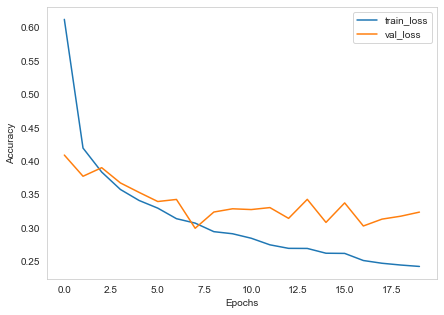

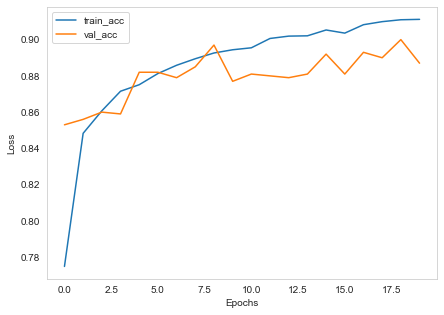

In [187]:
stat.history
epochs=20
x=range(epochs)
train_loss=stat.history['loss']
train_acc=stat.history['sparse_categorical_accuracy']
val_loss=stat.history['val_loss']
val_acc=stat.history['val_sparse_categorical_accuracy']
fig=plt.figure(1,figsize=(7,5))
plt.plot(x, train_loss)
plt.plot(x, val_loss)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train_loss','val_loss'])
plt.grid()
fig=plt.figure(2,figsize=(7,5))
plt.plot(x, train_acc)
plt.plot(x, val_acc)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train_acc','val_acc'])
plt.grid()

In [188]:
results=model.evaluate(x_test, y_test, verbose=0)
model.metrics_names
print('Loss : {}'.format(results[0]))
print('Accuracy : {}'.format(results[1]))

Loss : 0.3476939797401428
Accuracy : 0.8815000057220459
